## 02 - Python Finance

**Capitulo 02**: A partir das cotações de ações e do ÍNDICE BOVESPA do Yahoo Finance obtidas, podemos definir intervalos, calcular e plotar médias móveis nos gráficos.

Referência: BVSP, WEGE3


## Bibliotecas

Instalando o YFinance


In [3]:
!pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 5.5MB 11.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=c090211097e8157a5baecba33270cef9224b245db2803948e36261c5d8a22940
  Stored in directory: /tmp/pip-ephem-wheel-cache-2ue9f2nh/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


Importando as Bibliotecas

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

Importando o YFinance e sobrescrevendo os métodos do pandas_datareader

In [5]:
import yfinance as yf
yf.pdr_override()

## Obtendo os dados do mercado

Baixando as cotações do Yahoo Finance para o Índice Bovespa

In [6]:
ibov = web.get_data_yahoo('^BVSP')

[*********************100%***********************]  1 of 1 completed


Exibindo as cotações mais antigas

In [7]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-04-27,24.799999,25.400000,24.500000,24.500000,24.500000,0
1993-04-28,24.500000,24.600000,23.700001,24.299999,24.299999,0
1993-04-29,24.299999,24.799999,23.700001,23.700001,23.700001,0
1993-04-30,23.700001,24.200001,23.700001,24.100000,24.100000,0
1993-05-03,24.100000,24.400000,23.799999,24.100000,24.100000,0


Exibindo as cotações mais recentes

In [8]:
ibov.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-16,114845.0,114974.0,113370.0,114019.0,114019.0,78000
2021-03-17,114018.0,116736.0,113428.0,116549.0,116549.0,94300
2021-03-18,116549.0,116751.0,114302.0,114835.0,114835.0,9920100
2021-03-19,114837.0,116446.0,114610.0,116222.0,116222.0,12341800
2021-03-22,116222.0,116225.0,113620.0,114979.0,114979.0,8160600


Plotando o gráfico com o preços de abertura do Índice Bovespa

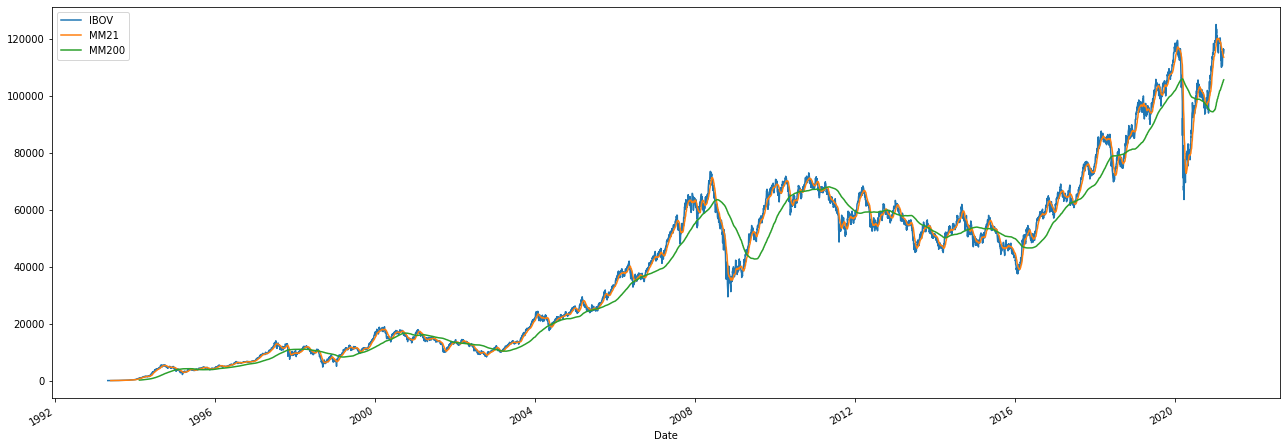

In [9]:
ibov["Open"].plot(figsize=(22,8), label="IBOV");
ibov["Open"].rolling(21).mean().plot(label="MM21")
ibov["Open"].rolling(200).mean().plot(label="MM200")
plt.legend()

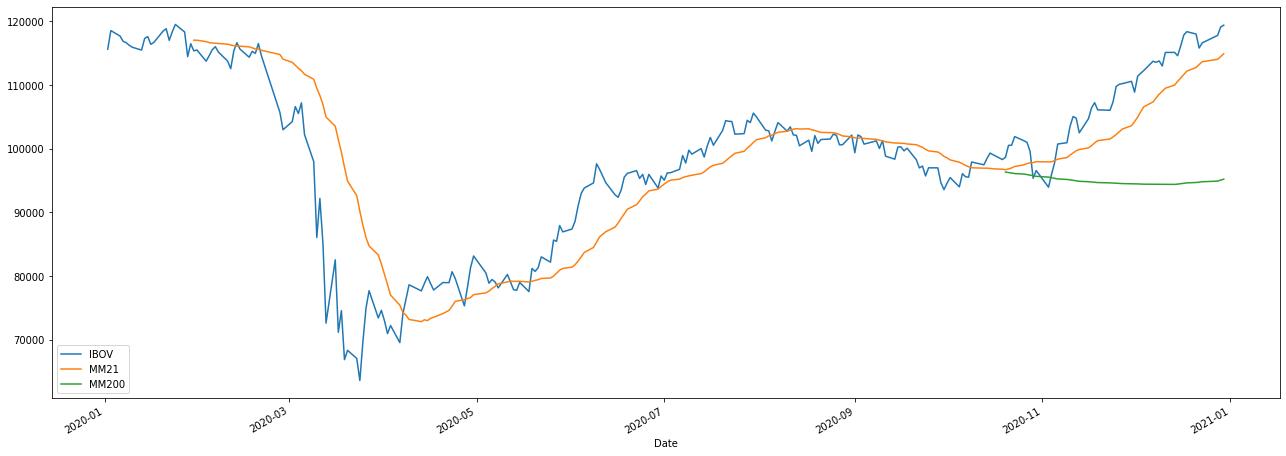

In [11]:
ibov_recorte = ibov[ibov.index.year == 2020]
ibov_recorte["Open"].plot(figsize=(22,8), label="IBOV");
ibov_recorte["Open"].rolling(21).mean().plot(label="MM21")
ibov_recorte["Open"].rolling(200).mean().plot(label="MM200")
plt.legend()

Plotando o gráfico com o preços de fechamento do Índice Bovespa

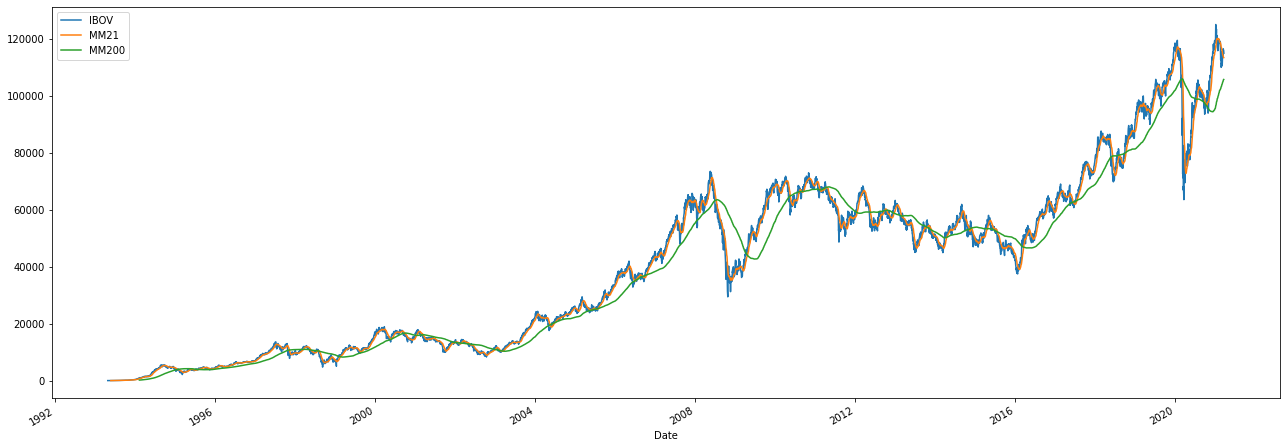

In [12]:
ibov["Close"].plot(figsize=(22,8), label="IBOV");
ibov["Close"].rolling(21).mean().plot(label="MM21")
ibov["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

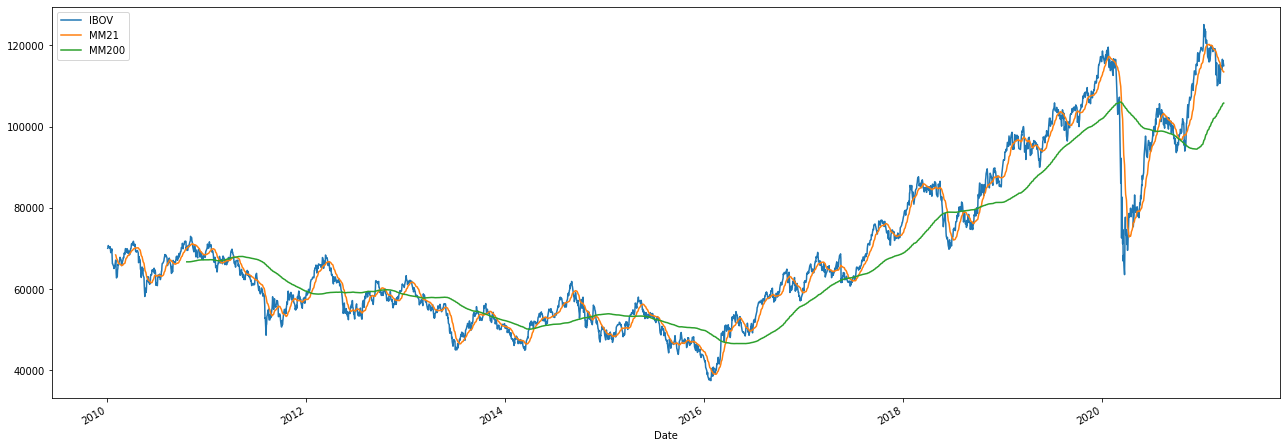

In [13]:
ibov_recorte = ibov[(ibov.index.year >= 2010) & (ibov.index.year <= 2021)]
ibov_recorte["Close"].plot(figsize=(22,8), label="IBOV")
ibov_recorte["Close"].rolling(21).mean().plot(label="MM21")
ibov_recorte["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

In [14]:
ibov_recorte = ibov[ibov.index.month == 12]
ibov_recorte.tail(50)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-12,86420.0,87946.0,86420.0,86977.0,86977.0,5000500
2018-12-13,86979.0,87842.0,86856.0,87838.0,87838.0,3658600
2018-12-14,87838.0,88184.0,87106.0,87450.0,87450.0,3553300
2018-12-17,87448.0,87820.0,86328.0,86400.0,86400.0,3849300
2018-12-18,86400.0,87274.0,86400.0,86610.0,86610.0,4093500
2018-12-19,86617.0,88101.0,85674.0,85674.0,85674.0,5664200
2018-12-20,85678.0,86584.0,84756.0,85269.0,85269.0,6100500
2018-12-21,85269.0,86554.0,85134.0,85697.0,85697.0,6076200
2018-12-26,85684.0,85684.0,83892.0,85136.0,85136.0,3355100


In [18]:
ibov_recorte = ibov[ibov.index.day == 7]
ibov_recorte.tail(50)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-08-07,56487.0,56923.0,55985.0,56188.0,56188.0,3049200
2014-10-07,57124.0,58318.0,57124.0,57436.0,57436.0,4874100
2014-11-07,52637.0,53483.0,52197.0,53223.0,53223.0,3592600
2015-01-07,48006.0,49882.0,48006.0,49463.0,49463.0,4408800
2015-04-07,53738.0,54002.0,53436.0,53729.0,53729.0,3487100
2015-05-07,57103.0,57290.0,56507.0,56921.0,56921.0,3065100
2015-07-07,52149.0,52388.0,51130.0,52344.0,52344.0,3538900
2015-08-07,50013.0,50013.0,48512.0,48577.0,48577.0,3218400
2015-10-07,47735.0,49290.0,47715.0,48914.0,48914.0,6060700


In [19]:
ibov = web.get_data_yahoo('WEGE3.SA', start='2010-01-01', end='2021-03-23')

[*********************100%***********************]  1 of 1 completed


In [20]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5.470414,5.547337,5.360946,5.423076,4.291248,1888406.0
2010-01-05,5.423076,5.443786,5.372781,5.411242,4.281887,714532.0
2010-01-06,5.393491,5.464497,5.384615,5.440828,4.305297,2053012.0
2010-01-07,5.485207,5.559171,5.443786,5.532544,4.377871,469820.0
2010-01-08,5.517751,5.739644,5.514792,5.733727,4.537064,1099514.0


In [21]:
ibov.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-16,73.739998,74.050003,71.849998,73.400002,73.400002,6324200.0
2021-03-17,72.349998,73.349998,71.750000,73.190002,73.190002,5290100.0
2021-03-18,72.389999,72.750000,71.510002,71.809998,71.809998,3972600.0
2021-03-19,72.010002,72.250000,70.750000,71.949997,71.949997,6946100.0
2021-03-22,71.500000,72.320000,70.099998,71.300003,71.300003,4645600.0


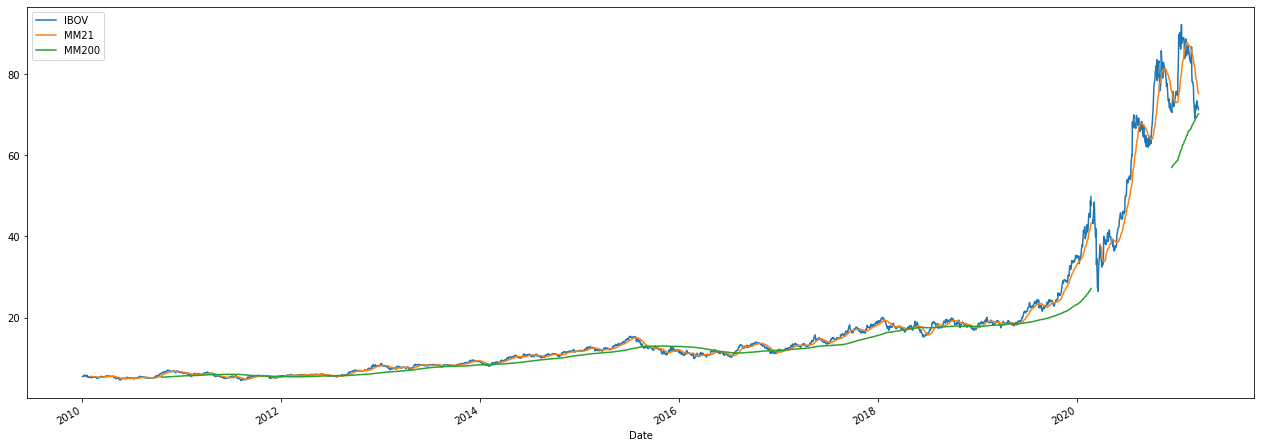

In [22]:
ibov["Close"].plot(figsize=(22,8), label="IBOV");
ibov["Close"].rolling(21).mean().plot(label="MM21")
ibov["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()